# Benchmark ComBind on PDB ligands

In [1]:
import numpy as np
from glob import glob
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
terms = ['hbond',  'mcss', 'sb', 'contact']

def extract_scores(fname):
    results = {}
    for fname in glob(fname):
        prot = fname.split('/')[4]
        if prot not in results: results[prot] = [{}, None]
        with open(fname) as fp:
            fp.readline()
            for line in fp:
                tok = line.strip().split(',')
                if len(tok) == 3:
                    results[prot][1] = map(lambda x: float(x.split('=')[1]), tok)
                else:
                    lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                    results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd))
    return results

def report(fname):
    results = extract_scores(fname)
    x, y = [], []
    for prot, ligs in results.items():
        for lig, (combind, glide, best) in ligs[0].items():
            x += [glide]
            y += [combind]
    print 'Glide Average:', sum(x) / float(len(x)), sum(np.array(x) <= 2.0) /  float(len(x))
    print 'ComBind Average:', sum(y) / float(len(y)), sum(np.array(y) <= 2.0) /  float(len(y))

print 'All'
fname = '../../combind_data/bpp_data/*/scores/pdb_seperated_hbond_pipi/pdb.sc'
report(fname)

print 'pipi'
fname = '../../combind_data/bpp_data/*/scores/pdb_seperated_hbond/pdb.sc'
report(fname)

for term in terms:
    fname = '../../combind_data/bpp_data/*/scores/pdb_no_{}/pdb.sc'.format(term)
    print term
    report(fname)

All
Glide Average: 3.68398864763 0.435555555556
ComBind Average: 3.42290445372 0.46
pipi
Glide Average: 3.68398864763 0.435555555556
ComBind Average: 3.43158629471 0.473333333333
hbond
Glide Average: 3.68398864763 0.435555555556
ComBind Average: 3.58410664989 0.453333333333
mcss
Glide Average: 3.68398864763 0.435555555556
ComBind Average: 3.43977812735 0.453333333333
sb
Glide Average: 3.68398864763 0.435555555556
ComBind Average: 3.41074248854 0.464444444444
contact
Glide Average: 3.68398864763 0.435555555556
ComBind Average: 3.45148010342 0.46


3.58712614297 3.58728971923


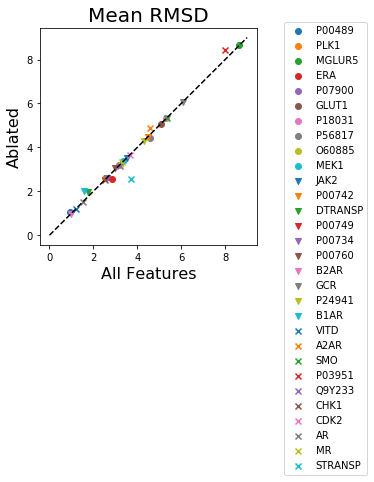

In [16]:
fname1 = '../../combind_data/bpp_data/*/scores/pdb_seperated_hbond_pipi/pdb.sc'
fname2 = '../../combind_data/bpp_data/*/scores/pdb_no_mcss/pdb.sc'

results1, results2 = extract_scores(fname1), extract_scores(fname2)

x, y, label = [], [], []
for prot, ligs in results1.items():
    _x, _y = [], []
    for lig in ligs[0]:
        _x += [results1[prot][0][lig][0]]
        _y += [results2[prot][0][lig][0]]
    label += [prot]
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('All Features', fontsize = 16)
plt.ylabel('Ablated', fontsize = 16)
plt.title('Mean RMSD', fontsize = 20)
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.plot(range(10), linestyle='--', c = 'k')
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()